In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from ggplot import *
import ast
plt.style.use('ggplot')
%matplotlib inline

In [3]:
# Import all data provided
df1 = pd.read_csv('loans_full.csv')
df2 = pd.read_csv('loans_details.csv')
df3 = pd.read_csv('loans_partner_details.csv')

C:\Users\PC\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (21,30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\PC\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (8,9,10,29,42,51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
# Already know that loans_full only has one unique column when compared with loans_details. This column is borrowers_count.
# Merge these two datasets on id
loans_merged= df2.merge(df1[['id', 'borrower_count']], left_on='id', right_on='id')

In [6]:
print('There are %d loans and %d columns' % (loans_merged.shape[0],loans_merged.shape[1]))

There are 127761 loans and 54 columns


In [8]:
print(loans_merged.dtypes)
loans_merged.head(5)

Unnamed: 0                                                int64
activity                                                 object
basket_amount                                           float64
bonus_credit_eligibility                                   bool
borrowers                                                object
currency_exchange_loss_amount                           float64
description.languages                                    object
description.texts.en                                     object
description.texts.es                                     object
description.texts.fr                                     object
description.texts.ru                                     object
funded_amount                                             int64
funded_date                                              object
id                                                        int64
image.id                                                  int64
image.template_id                       

,Unnamed: 0,activity,basket_amount,bonus_credit_eligibility,borrowers,currency_exchange_loss_amount,description.languages,description.texts.en,description.texts.es,description.texts.fr,...,terms.scheduled_payments,themes,translator.byline,translator.image,use,video.id,video.thumbnailImageId,video.title,video.youtubeId,borrower_count
0,139,General Store,0.0,True,"[{'first_name': 'Sidi', 'last_name': '', 'gend...",NaN,['en'],"Sidi is a married woman with two children, bot...",NaN,NaN,...,"[{'due_date': '2017-07-01T07:00:00Z', 'amount'...",NaN,NaN,NaN,"to purchase sugar, rice, maize flour, and whea...",NaN,NaN,NaN,NaN,1
1,140,Farming,0.0,False,"[{'first_name': 'Joaninah', 'last_name': '', '...",NaN,['en'],Joaninah is a married lady aged 35 years and b...,NaN,NaN,...,"[{'due_date': '2017-07-01T07:00:00Z', 'amount'...",NaN,Teresa Kramer,1940938.0,to buy a water tank for farming and foodstuffs...,NaN,NaN,NaN,NaN,1
2,141,Fruits & Vegetables,NaN,True,"[{'first_name': 'Naomi', 'last_name': '', 'gen...",NaN,['en'],Naomi is a married woman. She has five childre...,NaN,NaN,...,[],NaN,Michelle Archer,162079.0,to buy more stock of vegetables and charcoal.,NaN,NaN,NaN,NaN,1
3,142,Food Market,0.0,True,"[{'first_name': ' \tNazi ', 'last_name': '', '...",NaN,['en'],Nazi is a married mother of five children who ...,NaN,NaN,...,"[{'due_date': '2017-07-01T07:00:00Z', 'amount'...",NaN,NaN,NaN,to purchase sacks of coconuts for resale.,NaN,NaN,NaN,NaN,1
4,143,Farming,0.0,False,"[{'first_name': 'Rose', 'last_name': '', 'gend...",NaN,['en'],"Rose is 28 years old, she has 3 children and h...",NaN,NaN,...,"[{'due_date': '2017-07-01T07:00:00Z', 'amount'...",NaN,NaN,NaN,"to purchase fertilizers, beans and maize for p...",NaN,NaN,NaN,NaN,1


In [9]:
# Describe numeric columns
print(loans_merged.describe())

          Unnamed: 0  basket_amount  currency_exchange_loss_amount  \
count  127761.000000     848.000000                   24790.000000   
mean    64019.000000       0.117925                       5.735730   
std     36881.568208       1.713964                      12.991248   
min       139.000000       0.000000                       0.010000   
25%     32079.000000       0.000000                       0.950000   
50%     64019.000000       0.000000                       2.560000   
75%     95959.000000       0.000000                       6.540000   
max    127899.000000      25.000000                    1285.510000   

       funded_amount            id      image.id  image.template_id  \
count  127761.000000  1.277610e+05  1.277610e+05           127761.0   
mean      452.666737  7.371522e+05  1.589469e+06                1.0   
std       655.994647  3.424728e+05  6.062520e+05                0.0   
min         0.000000  2.510000e+02  4.090000e+02                1.0   
25%       225.

In [10]:
# Describe categorical columns
categorical = loans_merged.dtypes[loans_merged.dtypes == "object"].index
loans_merged[categorical].describe()

,activity,borrowers,description.languages,description.texts.en,description.texts.es,description.texts.fr,description.texts.ru,funded_date,location.country,location.country_code,...,terms.local_payments,terms.loss_liability.currency_exchange,terms.loss_liability.nonpayment,terms.repayment_interval,terms.scheduled_payments,themes,translator.byline,use,video.title,video.youtubeId
count,127761,127761,127761,123433,3,3,4,122230,127761,127761,...,127761,127761,127761,848,127761,28894,82254,123434,76,76
unique,148,32096,4,120304,3,3,4,113779,1,1,...,683,3,2,3,247,27,421,67377,72,74
top,Farming,"[{'first_name': 'Anonymous', 'last_name': '', ...",['en'],I was born in Kisii highlands where i grew up ...,"Richard is 47 years old, married to Roseline a...","Teresia is 37 years old, married and together ...",David is a married man. He has 7 children. He ...,2005-03-31T06:27:55Z,Kenya,KE,...,[],shared,lender,Monthly,[],['Rural Exclusion'],Tim Gibson,to purchase a solar light and gain access to c...,Kiva Entrepreneur John from Kenya,6dWFtYShzBk
freq,26170,2420,127751,13,1,1,1,24,127761,127761,...,126913,113590,125180,527,126913,15578,6915,1405,2,2


borrower_count
1     114747
2        847
3        656
4        585
5        761
6        620
7        724
8       1044
9       1004
10      1432
11      1124
12      1096
13       855
14       754
15       615
16       475
17        51
18        32
19        71
20       135
21        34
22        17
23        15
24        20
25        15
26         8
27         2
28         3
29         1
30         2
31         3
32         3
33         2
34         1
37         1
39         1
40         1
41         1
42         1
45         1
46         1
dtype: int64


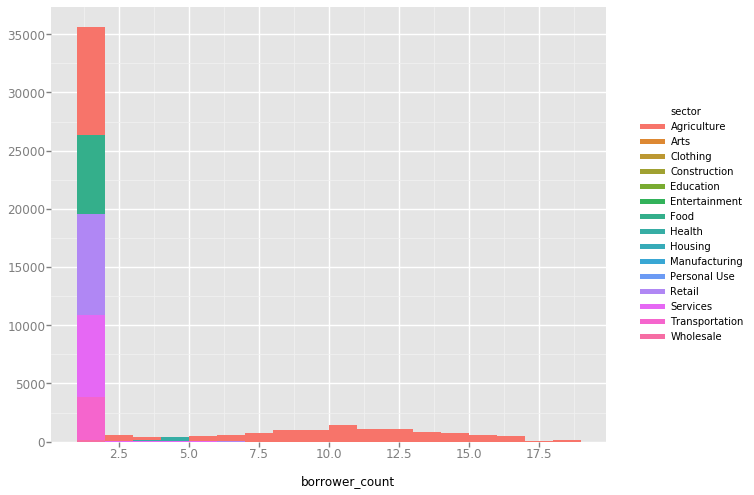

<ggplot: (133482356537)>

In [11]:
print(loans_merged.groupby("borrower_count").size())
ggplot(loans_merged[loans_merged['borrower_count'] < 20], aes(x='borrower_count', fill='sector')) +\
    geom_histogram(binwidth=1)

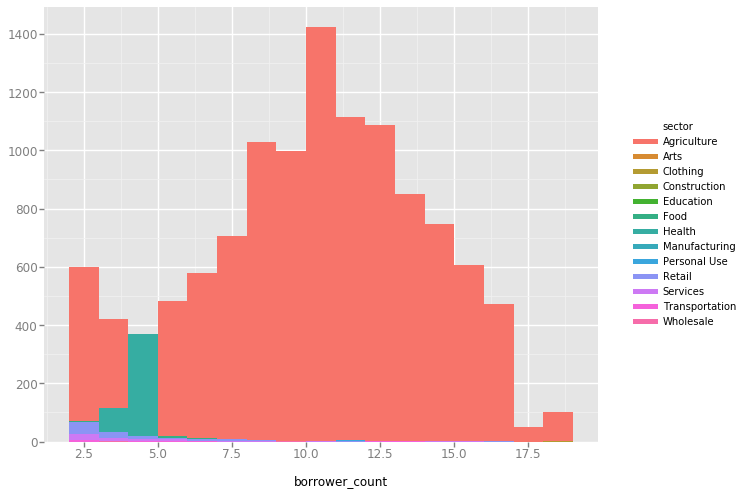

<ggplot: (133492067434)>

In [14]:
ggplot(loans_merged[(loans_merged['borrower_count'] < 20) & (loans_merged['borrower_count'] != 1)], aes(x='borrower_count', fill='sector')) +\
    geom_histogram(binwidth=1)

## Observation 1:
Majority of loans are a single borrower. For those which have more than one borrower - majority are for agriculture projects.

There are 148 different activities

 Just looking at the top 15 activites


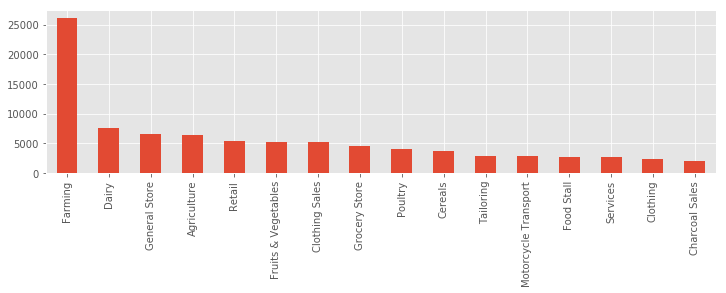

In [16]:
print("There are %d different activities" % loans_merged.activity.value_counts().size)
print("\n Just looking at the top 15 activites")
loans_merged.activity.value_counts()[0:16].plot(kind='bar',figsize=(12,3))

There are 15 different sectors


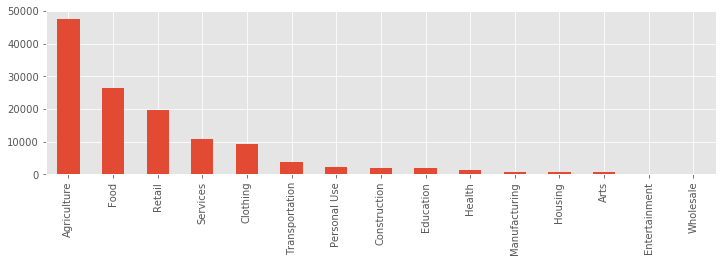

In [17]:
print("There are %d different sectors" % loans_merged.sector.value_counts().size)
loans_merged.sector.value_counts().plot(kind='bar',figsize=(12,3))

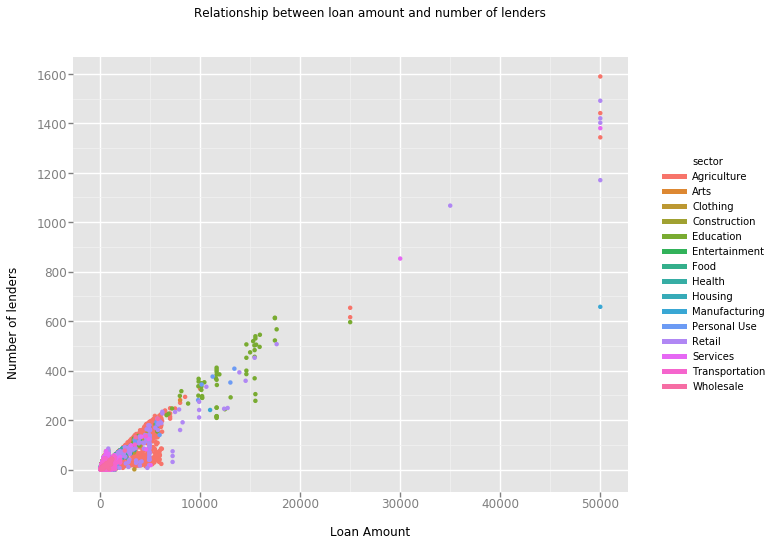

<ggplot: (-9223371903346511542)>

In [19]:
ggplot(loans_merged , aes(x = 'loan_amount', y = 'lender_count', color='sector')) + geom_point() + \
ggtitle("Relationship between loan amount and number of lenders") + xlab("Loan Amount") + ylab("Number of lenders")

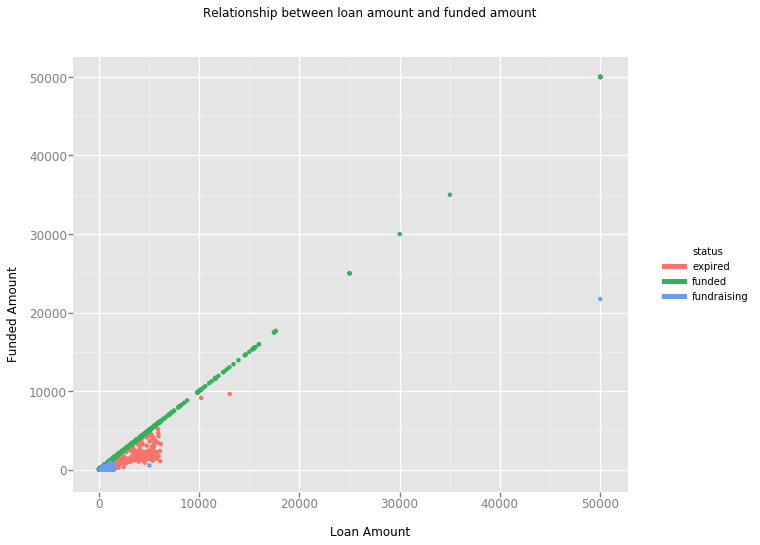

<ggplot: (133507923667)>

In [20]:
ggplot(loans_merged , aes(x = 'loan_amount', y = 'funded_amount', color='status')) + geom_point() + \
ggtitle("Relationship between loan amount and funded amount") + xlab("Loan Amount") + ylab("Funded Amount")

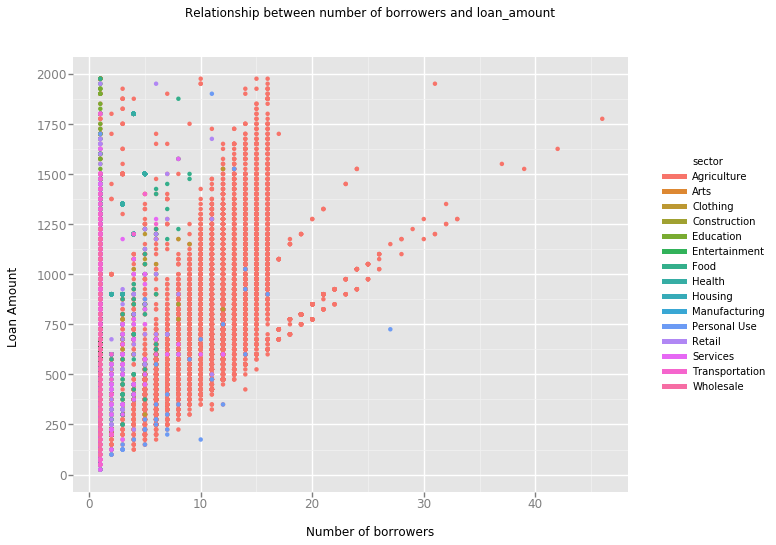

<ggplot: (-9223371903345268641)>

In [21]:
ggplot(loans_merged[loans_merged['loan_amount']<2000] , aes(x = 'borrower_count', y = 'loan_amount', color='sector')) + geom_point() + \
ggtitle("Relationship between number of borrowers and loan_amount") + xlab("Number of borrowers") + ylab("Loan Amount")

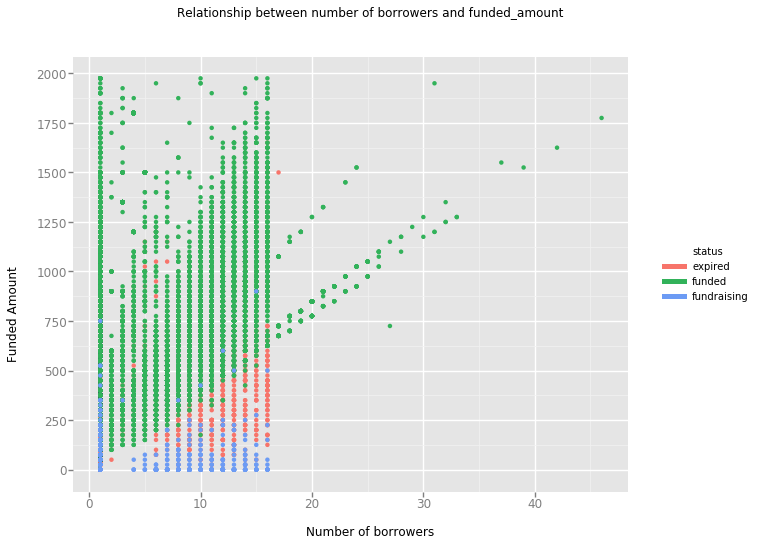

<ggplot: (133416075503)>

In [24]:
ggplot(loans_merged[loans_merged['loan_amount']<2000] , aes(x = 'borrower_count', y = 'funded_amount', color='status')) + geom_point() + \
ggtitle("Relationship between number of borrowers and funded_amount") + xlab("Number of borrowers") + ylab("Funded Amount")

## Observation 2:
Why is there a step change in the loan per person after 16 borrowers?
- Look at the ratio loan / # borrowers and see if there is some change over time?

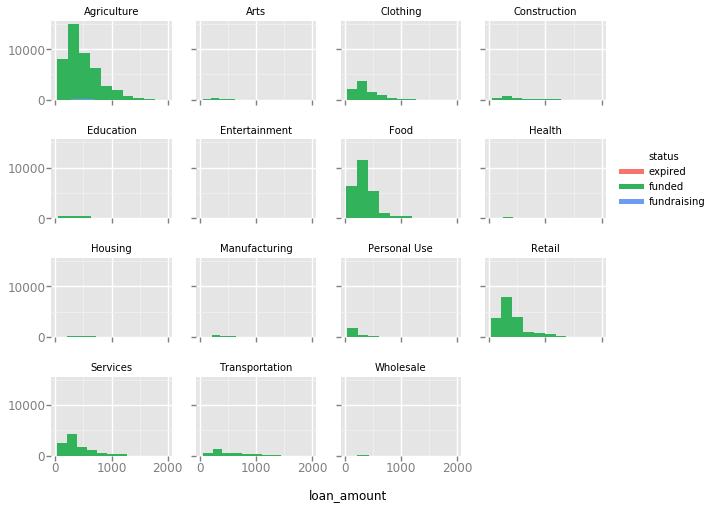

<ggplot: (-9223371903346520425)>

In [25]:
ggplot(aes(x = 'loan_amount',fill='status'), data = loans_merged[loans_merged.loan_amount < 2000]) + geom_histogram() + \
facet_wrap('sector')

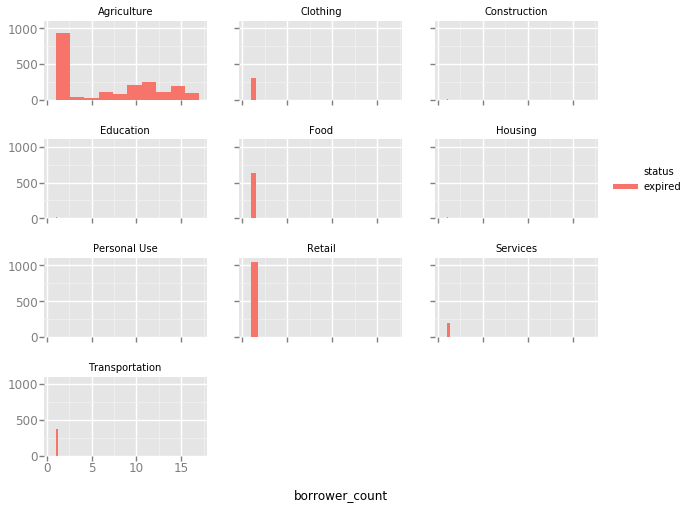

<ggplot: (-9223371903426780693)>

In [132]:
ggplot(aes(x = 'borrower_count', fill='status'), data = df1[df1.status == 'expired']) + geom_histogram() + \
facet_wrap('sector') 

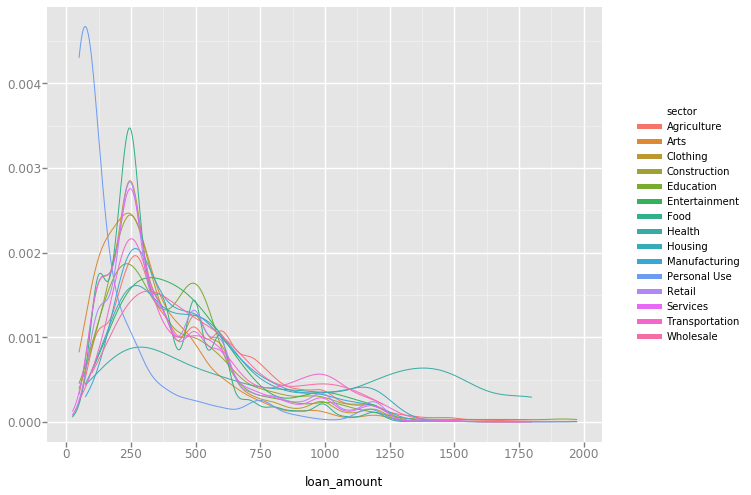

<ggplot: (-9223371903438317070)>

In [27]:
ggplot(loans_merged[loans_merged.loan_amount < 2000], aes(x='loan_amount', color='sector')) +\
    geom_density()

## Observation 3:
- Large majority of funded loans are $250 -why?


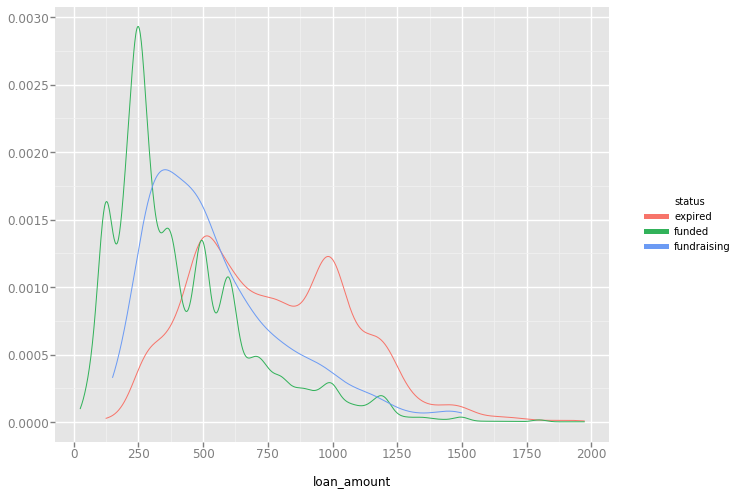

<ggplot: (133418716876)>

In [28]:
ggplot(loans_merged[loans_merged.loan_amount < 2000], aes(x='loan_amount', color='status')) +\
    geom_density()

## Observation 4:
Expired loans tend to be higher.
- what other factor impact the chance of expiration?
- group loans together by loan_amount brackets calculate expiration rate

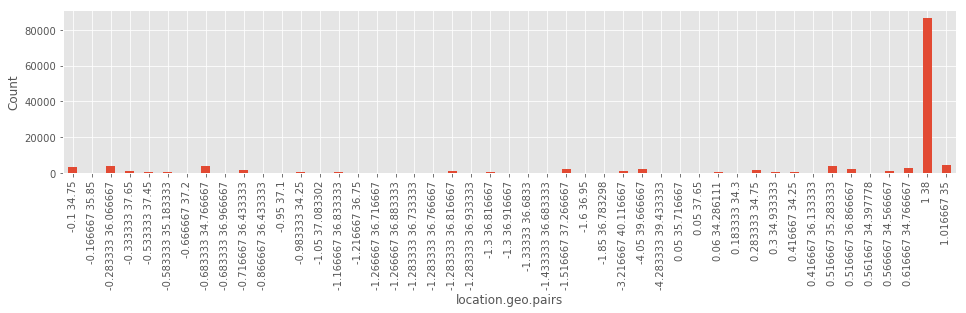

In [29]:
loans_merged.groupby(["location.geo.pairs"]).size().plot(kind='bar',figsize=(16,3)).set_ylabel('Count')

In [36]:
geo_pair_town = loans_merged.groupby(['location.geo.pairs','location.town']).size()
geo_pair_town['1 38']

location.town
: Akites, Chakol Division, Teso District      2
: Osajai, Amagoro,Teso District               1
AA                                            2
AA Estate, Nairobi                            3
AHERO                                         3
AWASI                                         5
Adongosi, Teso                                1
Adumai, Moding Division, Teso District –      1
Akiliamet-Teso District                       1
Aldina, Jomvu                                 2
Aldina,Jomvu                                  1
Aldina,Jomvu Kenya                            1
Amagoro, Teso District                        2
Amagoro,Teso District                         1
Angawa avenue Kisumu City                     1
Angurai – Teso - Kenya                        6
Angurai, Teso District                       27
Arosho;Migori                                 1
Asmin                                         1
Athi River  Town                              1
Athi river                

## Observation 5:
Whats happening here? Why is there so many at 1 38. Investigate this further.

In [119]:
#Calculating some new features that maybe of interest
#Gender
loans_merged['female'] = loans_merged['borrowers'].apply(lambda x: x.split("gender': '")[1][0]=='F') 

In [120]:
# Checking the borrower_count against the number of borrowers named.
loans_merged['borrower_count_check'] = loans_merged['borrowers'].apply(lambda x: len(ast.literal_eval(x)))/loans_merged['borrower_count']

In [121]:
loans_merged[loans_merged['borrower_count_check'] != 1][['borrower_count','borrowers']].shape
# only 7 records where the number of borrowers dont = the borrower_count. Not significant.

(7, 2)

In [122]:
# funded rate is the ratio between how much has been raised and how much has been funded
loans_merged['funded_rate']=loans_merged['funded_amount']/loans_merged['loan_amount']

In [212]:
loans_merged['loan_per_borrower'] = loans_merged['loan_amount']/loans_merged['borrower_count']

In [213]:
loans_merged['loan_per_lender'] = loans_merged['loan_amount']/loans_merged['lender_count']

In [123]:
# seperating out the month and year that loans were posted
loans_merged['posted_year'] = loans_merged['posted_date'].apply(lambda x: x.split("-")[0])
loans_merged['posted_month'] = loans_merged['posted_date'].apply(lambda x: x.split("-")[1])

In [162]:
tags = ['#Woman Owned Biz','#Parent','#Animals','#Schooling','#Repeat Borrower','#Elderly','#Single Parent','#Eco-friendly','#Technology']
cols = ['tag_woman_biz', 'tag_parent', 'tag_animals', 'tag_schooling', 'tag_repeat_borrower', 'tag_elderly', 'tag_single_parent', 'tag_eco', 'tag_technology']
cols.index('tag_parent')

1

In [164]:
for c in cols:
    loans_merged[c] = loans_merged['tags'].apply(lambda x: any(d['name'] == tags[cols.index(c)] for d in ast.literal_eval(x)))


In [165]:
loans_merged.groupby(['sector'])[loans_merged.columns[-14:-4]].sum()

,tag_woman_biz,tag_parent,tag_animals,tag_schooling,tag_elderly,tag_repeat_borrower,tag_single_parent,tag_eco,tag_technology,female
sector,,,,,,,,,,
Agriculture,7723.0,16630.0,6491.0,6007.0,4299.0,5721.0,255.0,7495.0,6085.0,30680.0
Arts,57.0,60.0,0.0,12.0,14.0,10.0,2.0,2.0,0.0,618.0
Clothing,2076.0,2102.0,7.0,505.0,103.0,868.0,208.0,734.0,5.0,7837.0
Construction,75.0,286.0,15.0,79.0,35.0,155.0,2.0,4.0,0.0,642.0
Education,19.0,253.0,4.0,901.0,24.0,147.0,15.0,1.0,73.0,1269.0
Entertainment,2.0,7.0,0.0,2.0,0.0,3.0,0.0,1.0,2.0,30.0
Food,6524.0,6579.0,230.0,1860.0,440.0,1984.0,428.0,10.0,9.0,21952.0
Health,22.0,170.0,0.0,12.0,35.0,26.0,4.0,142.0,19.0,847.0
Housing,52.0,98.0,3.0,26.0,30.0,73.0,15.0,8.0,4.0,576.0


In [168]:
ag_subset = loans_merged[(loans_merged.sector == 'Agriculture')&(loans_merged.loan_amount > 150)&(loans_merged.loan_amount < 350)]
ag_subset.describe()

,Unnamed: 0,basket_amount,currency_exchange_loss_amount,funded_amount,id,image.id,image.template_id,journal_totals.bulkEntries,journal_totals.entries,lender_count,...,terms.disbursal_amount,terms.loan_amount,terms.loss_liability.currency_exchange_coverage_rate,terms.repayment_term,translator.image,video.id,video.thumbnailImageId,borrower_count,borrower_count_check,funded_rate
count,13585.000000,133.000000,2039.000000,13585.000000,1.358500e+04,1.358500e+04,13585.0,13585.0,13585.0,13585.000000,...,13585.000000,13585.000000,13157.000000,13585.000000,7.370000e+03,0.0,0.0,13585.000000,13585.0,13585.000000
mean,48278.536253,0.187970,2.964497,249.808612,8.576503e+05,1.805298e+06,1.0,0.0,0.0,8.052116,...,22906.907343,253.726537,0.110770,14.389915,1.221677e+06,NaN,NaN,1.157895,1.0,0.986278
std,33308.738297,2.167775,2.946183,49.064235,2.966776e+05,5.173950e+05,0.0,0.0,0.0,2.959944,...,5416.925231,41.983383,0.031001,8.435744,6.692699e+05,NaN,NaN,0.789559,0.0,0.105530
min,140.000000,0.000000,0.010000,0.000000,3.000000e+02,4.610000e+02,1.0,0.0,0.0,0.000000,...,200.000000,175.000000,0.100000,2.000000,2.873300e+04,NaN,NaN,1.000000,1.0,0.000000
25%,21205.000000,0.000000,0.815000,200.000000,6.786760e+05,1.537506e+06,1.0,0.0,0.0,7.000000,...,20000.000000,200.000000,0.100000,12.000000,6.929780e+05,NaN,NaN,1.000000,1.0,1.000000
50%,42113.000000,0.000000,2.580000,250.000000,9.017460e+05,1.895495e+06,1.0,0.0,0.0,8.000000,...,21000.000000,250.000000,0.100000,14.000000,1.251749e+06,NaN,NaN,1.000000,1.0,1.000000
75%,70319.000000,0.000000,4.000000,300.000000,1.089658e+06,2.205927e+06,1.0,0.0,0.0,10.000000,...,25000.000000,300.000000,0.100000,14.000000,1.632475e+06,NaN,NaN,1.000000,1.0,1.000000
max,127892.000000,25.000000,24.830000,325.000000,1.288953e+06,2.512398e+06,1.0,0.0,0.0,35.000000,...,33591.000000,325.000000,0.200000,122.000000,2.499150e+06,NaN,NaN,11.000000,1.0,1.000000


In [195]:
tag_impact = []
for c in cols:
    x = ag_subset.groupby([c])['funded_rate'].mean() 
    results = {'tag': c, 'funded_rate_WO': x[0], 'funded_rate_W': x[1]}
    tag_impact.append(results)
    
tag_impact = pd.DataFrame(tag_impact)
tag_impact = tag_impact.set_index('tag')


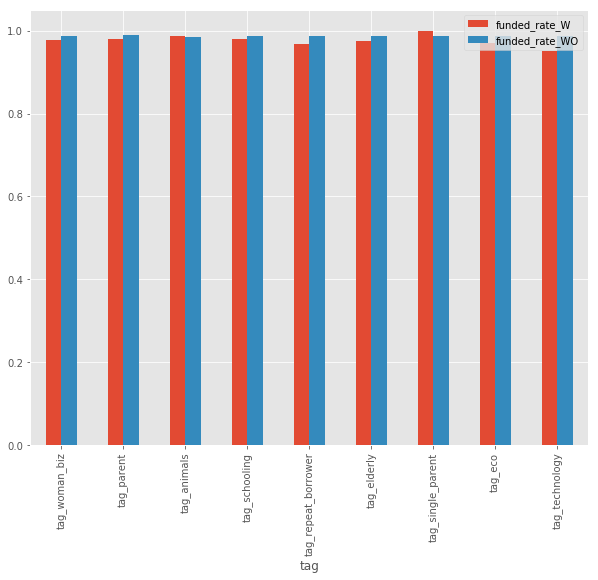

In [196]:
tag_impact.plot(kind='bar',figsize=(10,8))

## Observation 6
Taking a subset of similar loans (all agriculture and between 150 and 350 $), comparing the funded rate for different tags. 
- Almost all of them have a lower funded rate with a tag!
- Expect for single parent, which has a higher funded rate with a tag

How can we explore this further? Is this statistically significant? Do the tag effect how long loans take to be funded?

In [211]:
loans_by_gender = loans_merged.groupby(['female']).size()
num_total = loans_by_gender[0] + loans_by_gender[1] 
num_female = loans_by_gender[1]
num_male = loans_by_gender[0]
print("All loans: %.2f %% are female and %.2f %% are male" % (num_female*100/num_total, num_male*100/num_total))

expiry_by_gender = loans_merged[loans_merged['status']=='expired'].groupby(['female']).size()
e_num_total = expiry_by_gender[0] + expiry_by_gender[1] 
e_num_female = expiry_by_gender[1]
e_num_male = expiry_by_gender[0]
print("Of the expired loans: %.2f %% are female and %.2f %% are male" % (e_num_female*100/e_num_total, e_num_male*100/e_num_total))

funded_rate_by_gender = loans_merged[loans_merged.status != 'fundraising'].groupby(['female']).mean()
print(funded_rate_by_gender[['loan_amount','funded_amount','funded_rate']])

All loans: 68.66 % are female and 31.34 % are male
Of the expired loans: 34.23 % are female and 65.77 % are male
        loan_amount  funded_amount  funded_rate
female                                         
False    551.194846     514.698680     0.961349
True     435.038961     428.088664     0.990749


## Observation 7
Although women ask for less, they have a higher funded rate. Is this because they ask for less or because they are women? 

In [315]:
# look at how the loan_per_borrower and loan_per_lender changes over time
subset = loans_merged[['posted_year','posted_month','loan_per_borrower','loan_per_lender','funded_rate','loan_amount','female','sector','status']]
subset = subset.dropna()
subset['posted_date_ym'] = subset['posted_year'] + "-" + subset['posted_month']
subset = subset[subset.status != 'fundraising']

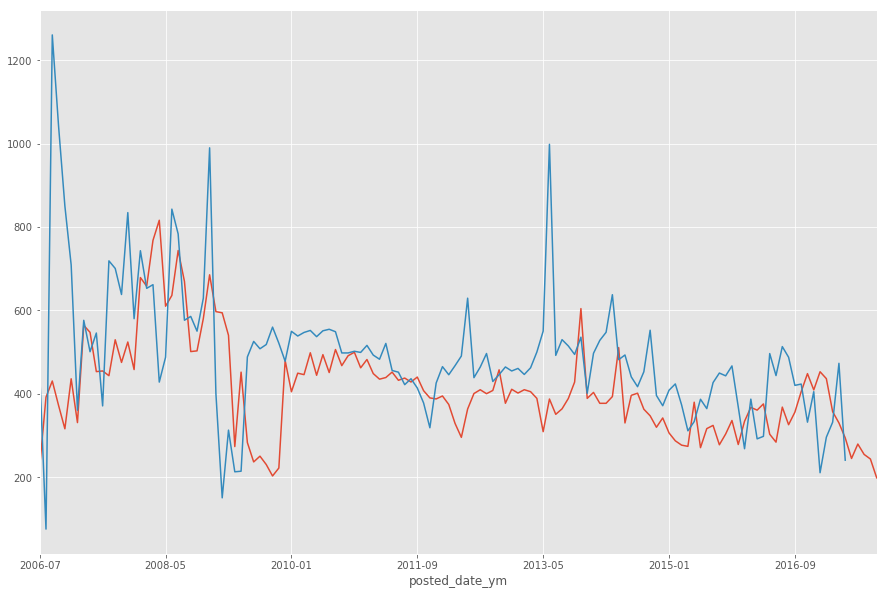

In [316]:

subset_female = subset[subset.female == True]
fig1 = subset_female.groupby(['posted_date_ym'])['loan_per_borrower'].mean().plot()
subset_male = subset[subset.female == False]
fig1 = subset_male.groupby(['posted_date_ym'])['loan_per_borrower'].mean().plot()

# blue is men, red in women

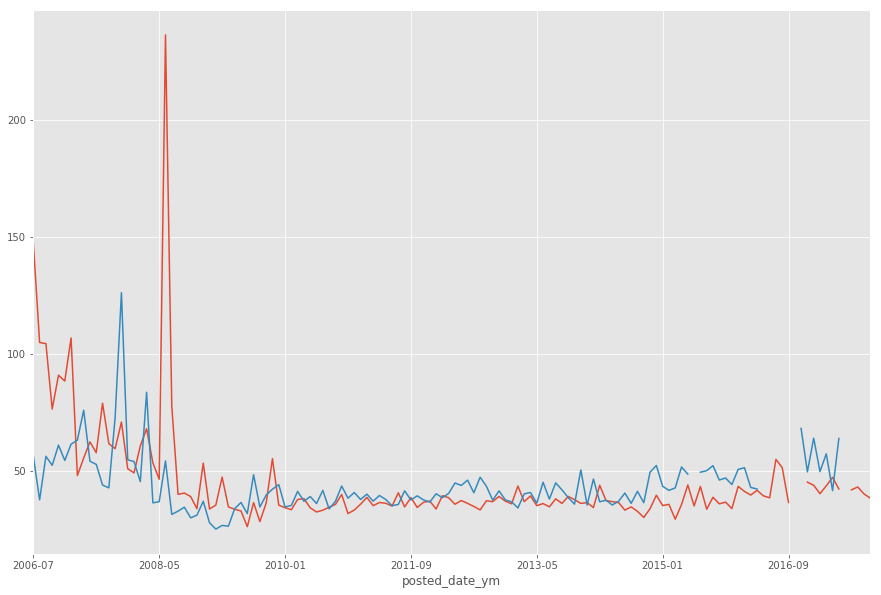

In [317]:
subset_female = subset[subset.female == True]
fig1 = subset_female.groupby(['posted_date_ym'])['loan_per_lender'].mean().plot()
subset_male = subset[subset.female == False]
fig1 = subset_male.groupby(['posted_date_ym'])['loan_per_lender'].mean().plot()

# blue is men, red in women

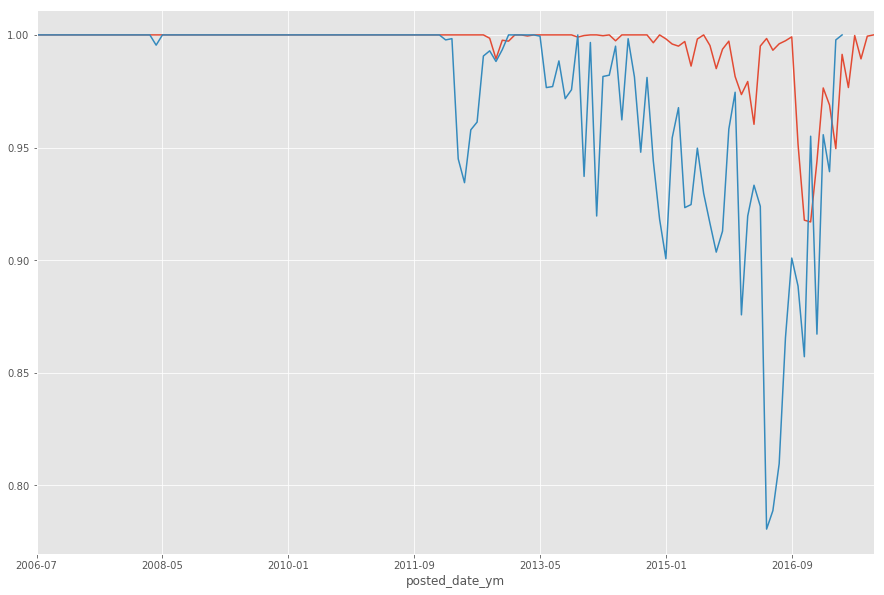

In [319]:
subset_female = subset[subset.female == True]
fig1 = subset_female.groupby(['posted_date_ym'])['funded_rate'].mean().plot()
subset_male = subset[subset.female == False]
fig1 = subset_male.groupby(['posted_date_ym'])['funded_rate'].mean().plot()

# blue is men, red in women

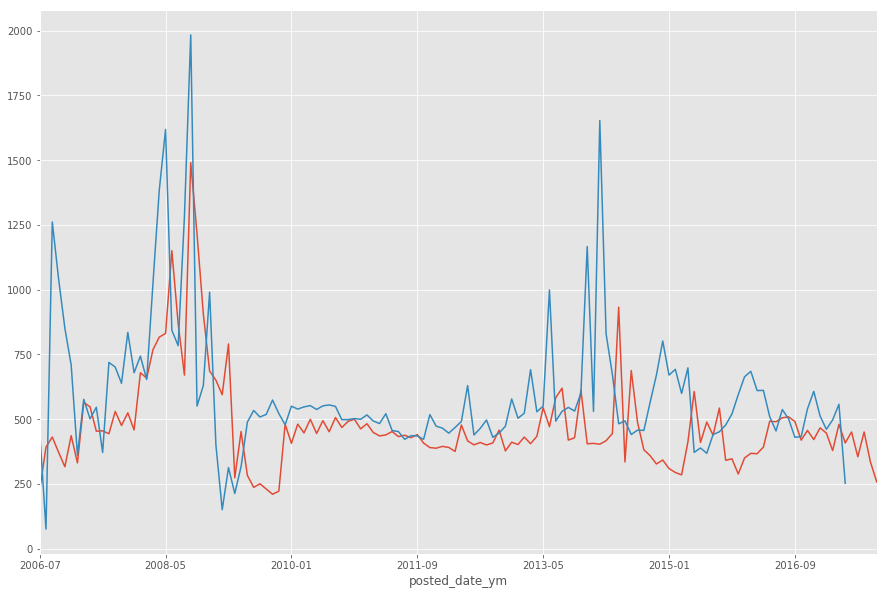

In [320]:
subset_female = subset[subset.female == True]
fig1 = subset_female.groupby(['posted_date_ym'])['loan_amount'].mean().plot()
subset_male = subset[subset.female == False]
fig1 = subset_male.groupby(['posted_date_ym'])['loan_amount'].mean().plot()

## Observation 8 
- average loan amount request per borrower has been relatively stable since 2010. gender bias not evident
- average loan amount paid per lender has settled at just under 40USD. gender bias not evident
- up until 2012, the majority of loans were funded. Mid 2016 saw a large increasing in the amount of under funded loans. This occurred much more for males compared to females.
- Average loan amounts have settled to between 300USD and 600USD. Womeans loans consistently lower then mens